In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import numpy as np
import xarray as xr
from datetime import timedelta as delta
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy.stats as stats

In [2]:
ds = xr.open_dataset("FADPreyBJ_no123_npart12_nfad1_T0.00_F1.00_P1.00_I0.01_p0.0_Pa0.1.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:     (trajectory: 12, obs: 201)
Coordinates:
  * obs         (obs) int32 0 1 2 3 4 5 6 7 ... 193 194 195 196 197 198 199 200
  * trajectory  (trajectory) int64 0 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    FADkap      (trajectory, obs) float32 ...
    Sta         (trajectory, obs) float32 ...
    Stac        (trajectory, obs) float32 ...
    Stna        (trajectory, obs) float32 ...
    Stnac       (trajectory, obs) float32 ...
    caught      (trajectory, obs) float32 ...
    lat         (trajectory, obs) float32 ...
    lon         (trajectory, obs) float32 ...
    ptype       (trajectory) float64 ...
    time        (trajectory, obs) timedelta64[ns] ...
    z           (trajectory, obs) float32 ...
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_mesh:           flat
    parcels_version:        2.4.2

In [4]:
time0 = ds.isel(obs = 1)

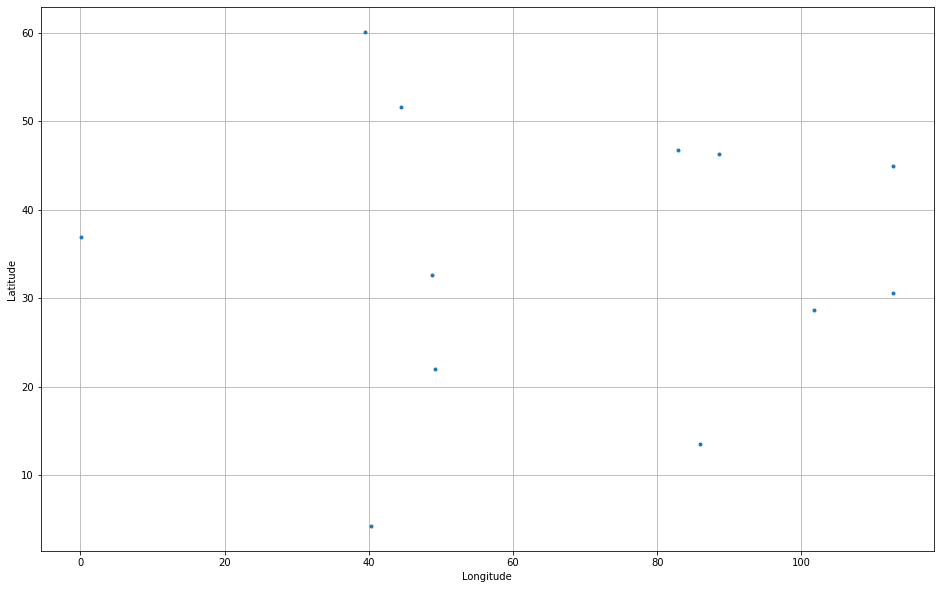

In [6]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(time0.lon.T, time0.lat.T, '.')
# ax.axvline(x = 24, c = 'black', ls = '--')
# rect = pat.Rectangle((29,-33),1,1.5,linewidth=1.5, edgecolor='r', facecolor='none', zorder = 2)
# ax.add_patch(rect)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
# ax.set_title("Agulhas Region Particle Movement Over 14 Days")
ax.grid()

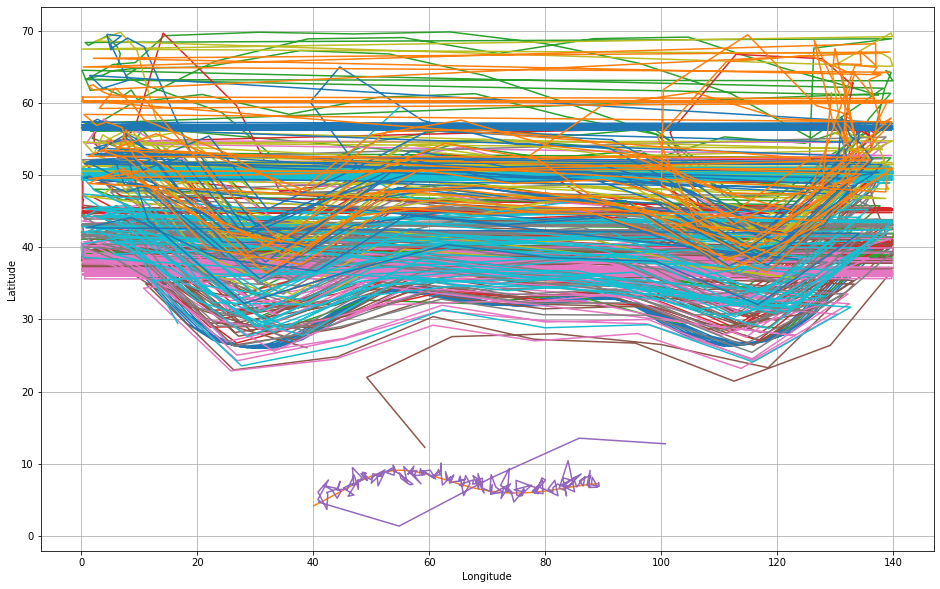

In [7]:
fig, ax = plt.subplots(figsize = (16, 10))

ax.plot(ds.lon.T, ds.lat.T)
# ax.axvline(x = 24, c = 'black', ls = '--')
# rect = pat.Rectangle((29,-33),1,1.5,linewidth=1.5, edgecolor='r', facecolor='none', zorder = 2)
# ax.add_patch(rect)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
# ax.set_title("Agulhas Region Particle Movement Over 14 Days")
ax.grid()

 ...]

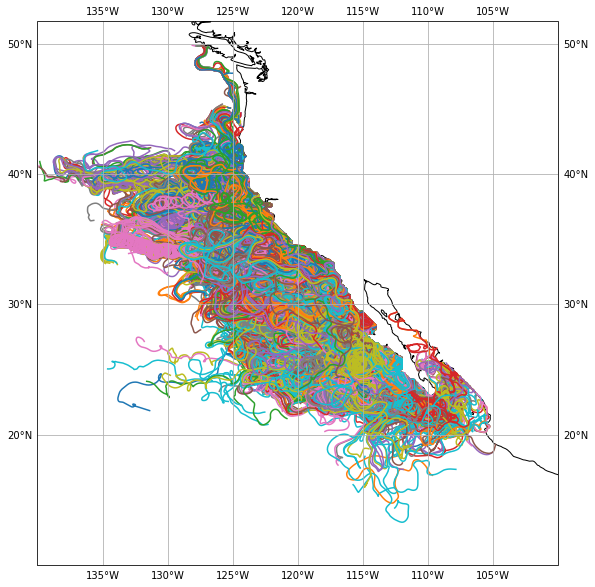

In [63]:
# Specify a map projection. There are many, many options. 
projection = ccrs.PlateCarree()

# Specify that the subplots should use the projection by passing a special key word argument 
fig, ax = plt.subplots(figsize = (16, 10), subplot_kw=dict(projection=projection))

# Specify the extend of the map (not mandatory, but often useful)
#      [min lon, max lon, min lat, max lat]
ax.set_extent([-140, -100, 10, 50])

ax.gridlines(draw_labels=True)
ax.coastlines()

# Plot data. You must include the projection of your data using the transform key word, 
# which in most cases is PlateCarree (think of this like 'no projection'). 
ax.plot(ds1.lon.T, ds1.lat.T, transform=ccrs.PlateCarree())

<ipython-input-67-8bc610f7459c>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Spectral_r')                 # Choose the colormap


 ...]

/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.8/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


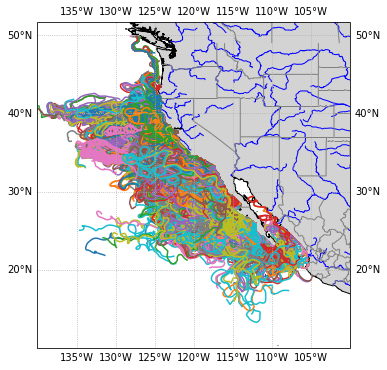

In [67]:
proj = ccrs.PlateCarree()                            # Choose the projection
cmap = plt.cm.get_cmap('Spectral_r')                 # Choose the colormap

land_10m = cfeature.NaturalEarthFeature(
		category='physical',
		name='land',
		scale='10m',
		edgecolor='k',
		facecolor='lightgrey')
states_provinces = cfeature.NaturalEarthFeature(
		category='cultural',
		name='admin_1_states_provinces_lines',
        scale='10m',
        edgecolor='gray',
        facecolor='none')
rivers = cfeature.NaturalEarthFeature(
        category='physical',
        name='rivers_lake_centerlines',
        scale='10m',
        edgecolor='blue',
        facecolor='none')

# lonmin=np.min(Lonsub)
# latmin=np.min(Latsub)
# lonmax=np.max(Lonsub)
# latmax=np.max(Latsub)

lonmin=-100
latmin=10
lonmax=-140
latmax=50

fig = plt.figure(figsize=(10,6)) 
ax  = plt.axes(projection=proj, extent=[lonmin,lonmax,latmin,latmax])

# Add coastlines
ax.add_feature(land_10m)
ax.add_feature(rivers)
ax.add_feature(states_provinces)
#ax.add_feature(cfeature.COASTLINE) 
# Add gridlines
ax.gridlines(linestyle=':',draw_labels=True) 

# Ajouter texte
#lonWF=[1]
#latWF=[2]
#city=['Wind Farm']
#ax.plot(lonWF[0],latWF[0], 'ro', zorder=5,transform=ccrs.PlateCarree())
#ax.text(lonWF[0] + 0.01, latWF[0] + 0.01, city[0], fontsize='large',transform=ccrs.PlateCarree())

# Ajouter texte
# border_lon = -126
# border_lat = 42.5
# ax.text(border_lon-1, border_lat+0.3, 'Wind Farm', fontsize='large', transform=ccrs.PlateCarree())
# ax.plot(border_lon+0.5, border_lat, 'r*', transform=ccrs.PlateCarree())

# ctf = ax.pcolor(Lon, Lat, T, cmap=plt.cm.Spectral_r)

ax.plot(ds1.lon.T, ds1.lat.T, transform=ccrs.PlateCarree())
# Ajouter une colorbar
# colorbar = fig.colorbar(ctf, ax=ax)
# colorbar.set_label('Temperature (°C)')